案例：churn

## 分析背景
AT&T运营商拥有海量的用户个人、通话、上网等数据，充分利用这些数据的基础上。

本项目使用分类模型预测AT&T客户流转情况，能够帮助挽留用户，保证用户基数和活跃度

## 分析目标
根据用户数据以及消费行为数据
- 使用Python建立分类模型
- 预测客户流转情况
- 找到对客户影响较大的因素，进而挽留客户

# 1 数据概况分析

### 指标解释
- CustomerID: 客户ID
- Gender: 性别
- partneratt: 客户配偶是否也是att用户
- dependies_att: 客户家人是否也是att用户
- landline: 是否使用att固话服务
- Paymentbank/creditcard/electronic: 客户付款方式
- MonthlyCharges: 每月话费
- TotalChardes: 累计话费
- Contact_month/1 year: 客户使用月度/年度合约
- Streamingtv/streamingmovies: 是否使用在线视频或者电影APP
- internet_att/internet_other: 是否使用att的互联网
- Churn: 客户的转化flag: yes表示流失，为1；no表示未流失，为0

In [2]:
#导入模块和数据
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

churn = pd.read_csv('churn.csv')
churn.head()

,Churn,gender,Partner_att,Dependents_att,landline,internet_att,internet_other,StreamingTV,StreamingMovies,Contract_Month,Contract_1YR,PaymentBank,PaymentCreditcard,PaymentElectronic,MonthlyCharges,TotalCharges
0,No,Female,1,0,0,1,0,0,0,1,0,0,0,1,29.85,29.85
1,No,Male,0,0,1,1,0,0,0,0,1,0,0,0,56.95,1889.50
2,Yes,Male,0,0,1,1,0,0,0,1,0,0,0,0,53.85,108.15
3,No,Male,0,0,0,1,0,0,0,0,1,1,0,0,42.30,1840.75
4,Yes,Female,0,0,1,0,1,0,0,1,0,0,0,1,70.70,151.65


In [6]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Churn              7043 non-null   object 
 1   gender             7043 non-null   object 
 2   Partner_att        7043 non-null   int64  
 3   Dependents_att     7043 non-null   int64  
 4   landline           7043 non-null   int64  
 5   internet_att       7043 non-null   int64  
 6   internet_other     7043 non-null   int64  
 7   StreamingTV        7043 non-null   int64  
 8   StreamingMovies    7043 non-null   int64  
 9   Contract_Month     7043 non-null   int64  
 10  Contract_1YR       7043 non-null   int64  
 11  PaymentBank        7043 non-null   int64  
 12  PaymentCreditcard  7043 non-null   int64  
 13  PaymentElectronic  7043 non-null   int64  
 14  MonthlyCharges     7043 non-null   float64
 15  TotalCharges       7043 non-null   float64
dtypes: float64(2), int64(12)

In [3]:
#查看完数据整体后，发现无缺失值
#对Churn, gender进行哑变量处理，便于以后分析
churn = pd.get_dummies(churn)
churn.head()

,Partner_att,Dependents_att,landline,internet_att,internet_other,StreamingTV,StreamingMovies,Contract_Month,Contract_1YR,PaymentBank,PaymentCreditcard,PaymentElectronic,MonthlyCharges,TotalCharges,Churn_No,Churn_Yes,gender_Female,gender_Male
0,1,0,0,1,0,0,0,1,0,0,0,1,29.85,29.85,1,0,1,0
1,0,0,1,1,0,0,0,0,1,0,0,0,56.95,1889.50,1,0,0,1
2,0,0,1,1,0,0,0,1,0,0,0,0,53.85,108.15,0,1,0,1
3,0,0,0,1,0,0,0,0,1,1,0,0,42.30,1840.75,1,0,0,1
4,0,0,1,0,1,0,0,1,0,0,0,1,70.70,151.65,0,1,1,0


In [5]:
#哑变量处理完后，列数增多，可考虑删除Churn_No, gender_Male
churn.drop(['Churn_No', 'gender_Male'], axis = 1, inplace = True)
churn.head()

,Partner_att,Dependents_att,landline,internet_att,internet_other,StreamingTV,StreamingMovies,Contract_Month,Contract_1YR,PaymentBank,PaymentCreditcard,PaymentElectronic,MonthlyCharges,TotalCharges,Churn_Yes,gender_Female
0,1,0,0,1,0,0,0,1,0,0,0,1,29.85,29.85,0,1
1,0,0,1,1,0,0,0,0,1,0,0,0,56.95,1889.50,0,0
2,0,0,1,1,0,0,0,1,0,0,0,0,53.85,108.15,1,0
3,0,0,0,1,0,0,0,0,1,1,0,0,42.30,1840.75,0,0
4,0,0,1,0,1,0,0,1,0,0,0,1,70.70,151.65,1,1


In [12]:
#变量大小写不规则，统一改成小写，即新变量 = 原变量的字符串小写方法
#churn.columns = churn.columns.str.lower()

#将Churn_Yes命名为flag，方便后续的变量编写
churn = churn.rename(columns = {'Churn_Yes': 'flag'})
churn.head()

,Partner_att,Dependents_att,landline,internet_att,internet_other,StreamingTV,StreamingMovies,Contract_Month,Contract_1YR,PaymentBank,PaymentCreditcard,PaymentElectronic,MonthlyCharges,TotalCharges,Flag,gender_Female
0,1,0,0,1,0,0,0,1,0,0,0,1,29.85,29.85,0,1
1,0,0,1,1,0,0,0,0,1,0,0,0,56.95,1889.50,0,0
2,0,0,1,1,0,0,0,1,0,0,0,0,53.85,108.15,1,0
3,0,0,0,1,0,0,0,0,1,1,0,0,42.30,1840.75,0,0
4,0,0,1,0,1,0,0,1,0,0,0,1,70.70,151.65,1,1


# 2 单变量分析

## 2.1 正负样本占比

### 分类模型：判断好和坏（即好坏分数可以预测变坏概率，如芝麻评分）：
- 分数越高：变坏概率越低
- 分数越低：变坏概率越高

In [13]:
#二分类模型，分析Flag为1和0的占比
churn.Flag.value_counts()

0    5174
1    1869
Name: Flag, dtype: int64

In [14]:
#传1进函数，表示总比例为1时，Flag为1和0的占比
#在二分类问题中，0和1的占比要保持平衡性
#理想状态下1和0分布各为0.5，但实际情况中要求不低于0.05，不然会影响模型的预测
churn.Flag.value_counts(1)

0    0.73463
1    0.26537
Name: Flag, dtype: float64

In [15]:
#按Flag将数据进行汇总，求出各种情况平均值的占比情况
summary = churn.groupby('Flag')
summary.mean()

,Partner_att,Dependents_att,landline,internet_att,internet_other,StreamingTV,StreamingMovies,Contract_Month,Contract_1YR,PaymentBank,PaymentCreditcard,PaymentElectronic,MonthlyCharges,TotalCharges,gender_Female
Flag,,,,,,,,,,,,,,,
0,0.528218,0.344801,0.901044,0.379204,0.347700,0.365868,0.369927,0.429068,0.252609,0.248550,0.249324,0.250097,61.265124,2545.918081,0.492656
1,0.357945,0.174425,0.909042,0.245586,0.693954,0.435527,0.437667,0.885500,0.088818,0.138042,0.124131,0.573034,74.441332,1528.514714,0.502408


- internet_other在0的均值是0.34，在1的均值是0.69，表示越是使用竞争对手的互联网APP，客户流失率越高
- Contract_Month在0的均值是0.42，在1的均值是0.88，即按月付费的客户流失率高于按年付费的客户流失率
- TotalCharges在0的均值是2545，在1的均值是1528，即客户累积支出费用越多，客户流失率越低
- gender_Female在0的均值是0.49，在1的均值是0.50，即说明性别无太大的区分关系

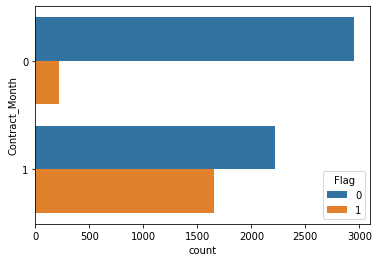

In [17]:
sns.countplot(y = 'Contract_Month', hue = 'Flag', data = churn)

- Flag中客户流失为1，未流失为0；Contract_Month中客户按年付费为0，按月付费为1
- 与按年付费客户相比，按月付费客户流失率较高

# 3 相关性分析

## 3.1 变量之间的相关性分析

In [20]:
#围绕Flag变量，分析其他变量与它的相关关系
churn.corr()[['Flag']].sort_values('Flag', ascending = False)

,Flag
Flag,1.000000
Contract_Month,0.405103
internet_other,0.308020
PaymentElectronic,0.301919
MonthlyCharges,0.193356
StreamingTV,0.063228
StreamingMovies,0.061382
landline,0.011942
gender_Female,0.008612
PaymentBank,-0.117937


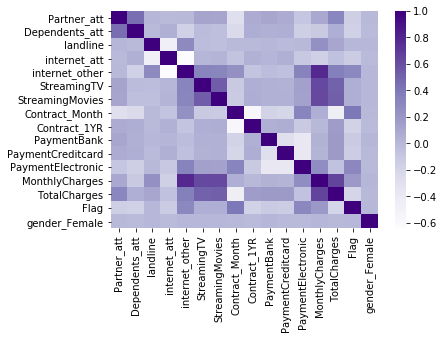

In [25]:
sns.heatmap(churn.corr(), cmap = 'Purples')

- Flag与internet_other, Contract_Month, PaymentElectronic成强正相关关系
- Flag与TotalCharges成弱相关关系
- 其他变量与Flag的相关关系较弱，不做过度解读

# 4 逻辑回归模型

## 4.1 建立模型

In [40]:
#设定自变量和因变量(先挑选Contract_Month, internet_other, StreamingTV作为自变量)
#一定要先设定自变量和因变量才能建模
x = churn[['Contract_Month', 'internet_other', 'StreamingTV']]
y = churn['Flag']

In [41]:
#调用sklearn模块，随机抽取训练集和测试集
from sklearn.model_selection import train_test_split
#test_size = 0.3 即设置抽取比例为70/30
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 100)

#调用sklearn中逻辑回归模块
from sklearn import linear_model
lr = linear_model.LogisticRegression()

#拟合
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
#系数
lr.coef_

array([[2.2229613 , 1.15089043, 0.24559832]])

- 即当Contract_Month由0到1时，不流失到流失的概率提升是e的2.22
- 从之前的summary.mean()也可以看出，StreamingTV越大，越可能成为流失目标
- 从系数上反映，不同变量对于预测客户是否会流失的评价范围也是不一样的
- 所以要把握方向性，负数为反相关，系数越大对于预测的影响越大

In [43]:
#截距
lr.intercept_

array([-3.25029156])

In [55]:
#通过训练集和测试集的x分别计算出对应的预测值
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

print(y_pred_train)

[0 1 0 ... 0 1 1]


- 即如果真实值为0、1，那么预测值也为0、1
- 可以用混淆矩阵来理解（0和1的4种组合方式00，01，10，11，按从上到下，从左到右分布在四个象限中，符合真实值和预测值相等的情况只有00，11即第二和第四象限）

## 4.2 模型评估

### 4.1.1 评估方法1：计算准确率

In [50]:
#搭建训练集混淆矩阵
import sklearn.metrics as metrics
metrics.confusion_matrix(y_train, y_pred_train)

array([[2975,  652],
       [ 483,  820]])

- 即预测正确的是2975和820，错误的是652和483
- 准确率 = （预测正确的个数之和）/（预测总数）= (2975+820)/(2975+820+483+820) = 0.7697

In [52]:
#查看训练集准确率
metrics.accuracy_score(y_train, y_pred_train)

0.7697768762677485

In [56]:
#搭建测试集混淆矩阵
metrics.confusion_matrix(y_test, y_pred_test)

array([[1233,  314],
       [ 224,  342]])

In [58]:
#查看训练集准确率
metrics.accuracy_score(y_test, y_pred_test)

0.7453857075248462

#### 比较训练集和测试集的准确率，保证内在信息一致性:
- 模型在train和test的表现中不能相差过大
- 任何在业务场景的预测，核心是用过去预测未来
- 有了这些结果和特征之后，都可以预测未来
- 但是未来客群和特点都可能会发生变化，需要做出自己的平衡
- train和test只是帮助建立一个概念，不要为了单独的模型太过追求准确率


### 4.1.2 评估方法2：ROC和AUC

In [67]:
#一般好模型得分在0.7 - 0.8之间
from sklearn.metrics import roc_curve, auc
fpr,tpr,threshold = roc_curve(y_train, y_pred_train)
roc_auc = auc(fpr,tpr)

print(roc_auc)

0.7247770357096229


## 4.3 模型优化

### 模型优化步骤：
1 调整train和test的占比，或者调整x自变量后，再调整train和test的占比

2 调用相应模块

3 通过测试集和训练集的x自变量计算出各自的预测值

4 计算训练集与测试集的准确率